<a href="https://colab.research.google.com/github/dagohub/sigmoidal_data_science/blob/main/Projeto_DSNP_Analisando_os_Dados_do_Airbnb_Vancouver_Canada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Vancouver, Canada*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Vancouver, Canada, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados
Nesta análise exploratória serão importados os dados disponiblizados pelo portal Inside Airbnb para a cidade de [Vancouver](http://insideairbnb.com/get-the-data/#:~:text=Vancouver%2C%20British%20Columbia%2C%20Canada).

O arquivo contendo os dados a serem utilizados na análise é o destacado abaixo:
* `listings.csv` - 	*Summary information and metrics for listings in Vancouver (good for visualisations)*, disponibilizado na data de 11/12/2022.


In [1]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar dados do arquivo listings.csv referente à Vancouver de 11/12/2022
df = pd.read_csv("http://data.insideairbnb.com/canada/bc/vancouver/2022-12-11/visualisations/listings.csv")

## Análise dos Dados
Esta etapa tem o objetivo criar um cenário inicial, identificando as informações disponíveis no banco de dados e a estrutura do mesmo.

Um bom método para verificar o conteúdo do nosso banco de dados (*DataFrame*) é verificar quais são as primeiras entradas e também quais variáveis temos à nossa disposição.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,13358,Monthly (or Longer ) Designer One Bedroom Down...,52116,Lynn,NaN,West End,49.28201,-123.12669,Entire home/apt,150,3,438,2022-10-30,2.88,1,82,7,18-611603
1,13490,Vancouver's best kept secret,52467,Iris,NaN,Kensington-Cedar Cottage,49.25622,-123.06607,Entire home/apt,150,30,96,2022-11-06,0.68,1,165,5,NaN
2,14267,EcoLoft Vancouver,56030,Peter & Alison,NaN,Kensington-Cedar Cottage,49.24922,-123.08139,Entire home/apt,150,3,34,2021-07-14,0.23,1,0,0,21-156500
3,14424,Spacious one-bedroom in sought-after Strathcona,56709,Samantha Jo,NaN,Downtown Eastside,49.27921,-123.08835,Entire home/apt,108,30,263,2022-10-20,1.68,3,81,5,19-162091
4,16254,Close to PNE/Hastings Park Garden level suite,63238,Jason,NaN,Hastings-Sunrise,49.27721,-123.04086,Entire home/apt,350,3,7,2022-07-30,0.13,1,101,2,19-162421


###**Dicionário das variáveis do banco de dados**

Para um melhor entendimento das análise ao longo deste notebook, abaixo estão listadas as variáveis e uma breve descrição.



* `id` - número do identificador atribuído ao imóvel 
* `name` - nome da acomodação definido pelo anfitrião
* `host_id` - número de identificação do anfitrião na plataforma do Airbnb
* `neighbourhood_group` - região onde encontra-se a acomodação. Não se aplica no dataset analisado
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da latitude da propriedade
* `room_type` - indica o tipo da acomodação oferecida no anúncio. Por exemplo: quarto, apartamento, casa inteira.
* `price` - preço por noite da locação
* `minimum_nights` - quantidade mínima de noites exigida para reserva
* `number_of_reviews` - quantidade de avaliações recebidas de hóspedes
* `last_review` - data da última avaliação recebida de um hóspede
* `reviews_per_month` - média do número de avaliações recebidas por mês
* `calculated_host_listings_count` - número de anúncios do mesmo anfitrião
* `availability_365` - dias disponíveis dentro do período de 365 dias
* `number_of_reviews_ltm` - número de avaliações recebidas pelo anúncio nos últimos 12 meses
* `licence` - licença do proprietário para a locação. A cidade de Vancouver exige que a licença para locações de curta duração seja incluída em anúncios, conforme disponível no seu [site oficial](https://vancouver.ca/doing-business/short-term-rentals.aspx)


Na sequência, vamos analisar algumas questões sobre o banco de dados em si e a qualidade das informações presentes.

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui?**
###**Quais os tipos das variáveis?**

Nesta etapa identificaremos a quantidade de entradas disponíveis e o tipo de varíavel presente em cada coluna já indentificada no dicionário acima.

In [4]:
# identificar o volume de dados do DataFrame
print("Número de entradas do DataFrame: \t {}".format(df.shape[0]))
print("Número de variáveis do DataFrame: \t {}\n".format(df.shape[1]))

# verificar o tipo dos dados presente nas variáveis
print("Tipo de dado disponível em cada variável:\n")
display(df.dtypes)

Número de entradas do DataFrame: 	 5676
Número de variáveis do DataFrame: 	 18

Tipo de dado disponível em cada variável:



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos ou faltantes são significativos em relação ao total de entradas do nosso *dataset*.

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.285236
reviews_per_month                 0.172304
last_review                       0.172304
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

Os resultados obtidos nos permitem observar que:

* A coluna `neighbourhood_group` está com valores faltantes em todas as entradas
* A coluna `licence` tem quase 1/3 de valores faltantes, mesmo sendo obrigatório a presença deste valor segundo a regulamentação local.
* As colunas `reviews_per_month` e `last_review` tem aproximadamente 17% de valores ausentes.

### **Q3. Qual o tipo de distribuição das variáveis?** 

As variáveis numéricas nos permitem gerar gráficos para auxiliar na visualização dos intervalos disponíveis.

Abaixo vamos plotar o histograma para cada uma delas.

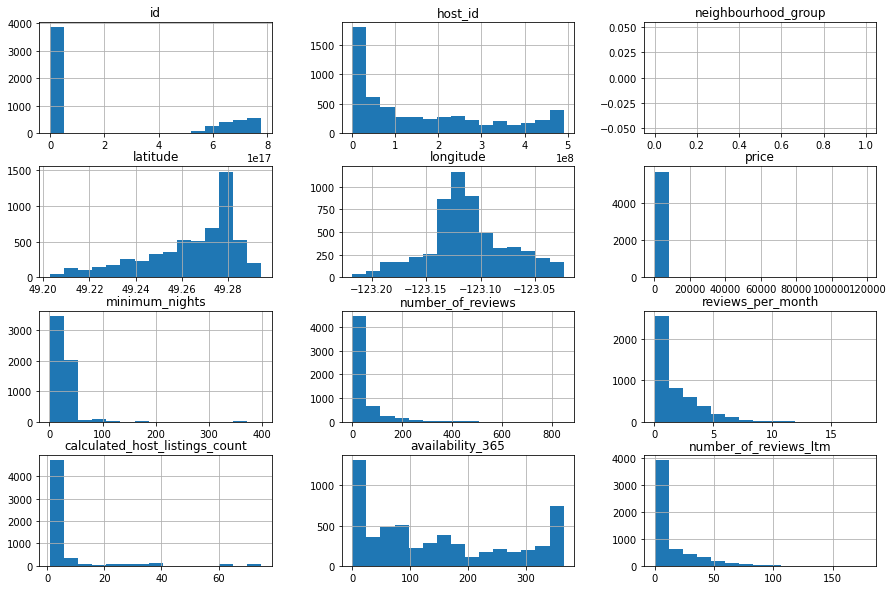

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *ouliers* presentes?**

Em uma análise de dados, *outliers* são valores que não seguem uma distribuição e geralmente distorcem a representação gráfica.

Nos histogramas que plotamos, as variáveis `price` e `minimum_nights` apresentam indícios de *ouliers*.
Para confirmar esta teoria, vamos utilizar dois métodos para auxiliar na detecção de *outliers*: 

1.   Analisar o resumo estatístico da variável através do método `describe()`
2.   Plotar `boxplots` para as variáveis em questão


In [7]:
# verificar o resumo estatístico de todas as variáveis numéricas.
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5676.000000,5676.000000,5676.000000,4698.000000,5676.000000,5676.000000
mean,265.842671,17.220754,38.424771,1.711713,5.668428,146.456660
std,2640.961017,32.292393,67.402732,1.794643,12.692153,126.752859
min,20.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,100.000000,2.000000,2.000000,0.320000,1.000000,32.000000
50%,141.000000,3.000000,11.000000,1.000000,1.000000,114.000000
75%,205.000000,30.000000,46.000000,2.680000,3.000000,259.000000
max,119149.000000,399.000000,846.000000,17.930000,75.000000,365.000000


A partir do resumo estatístico, observamos algumas informações que confirmam nossas teorias: 

* A quantidade mínima de noites (`minimum_nights`) supera um ano em seu valor máximo (399), enquanto que 75% dos valores está abaixo de 30 dias.

* A variável `price` possui 75% dos seus valores abaixo de 205, enquanto que seu valor máximo é de 119149. O valor médio de locação (265.84) está acima de 75% das entradas

Vamos agora analisar mais afundo estas duas variáveis plotando o `Boxplot` de ambas.

#### Boxplot para `minimum_nights`

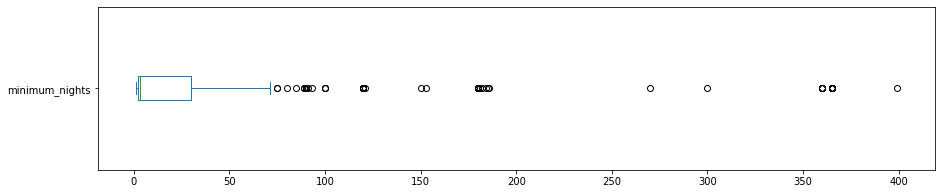

Variável: minimum_nights
Quantidade de entradas acima de 30 dias: 333 entradas
Estas entradas representam: 5.8668% do total


In [9]:
# Boxplot da variável minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# verificar valores acima de 30 dias para minimum_nights
print("Variável: minimum_nights")
print("Quantidade de entradas acima de 30 dias: {} entradas". format(len(df[df.minimum_nights > 30])))
print("Estas entradas representam: {:.4f}% do total".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))


#### Boxplot para `price`

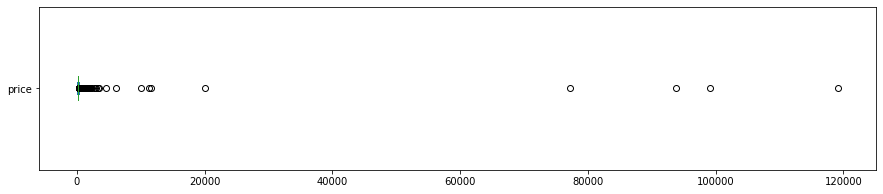

Variável: price
Preços acima de 800 dólares: 90 entradas
Estas entradas representam: 1.5856% do total


In [16]:
# Boxplot da variável price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# verificar valores acima de 800 dólares para price
print("Variável: price")
print("Preços acima de 800 dólares: {} entradas". format(len(df[df.price > 800])))
print("Estas entradas representam: {:.4f}% do total".format((len(df[df.price > 800]) / df.shape[0])*100))

#### Histogramas sem *outliers* 
Com os *outliers* identificados nas duas variáveis analisadas (`price` e `minimum_nights`), vamos dar sequência na limpeza do nosso *DataFrame* e plotar novamente os histogramas. A limpeza consiste em:

1. Remover entradas com valor de alguel acima de 800 dólares.
2. Remover entradas com valores acima de 30 dias para locação mínima
3. Remover a coluna `neighbourhood_group`, pois não possui entradas.




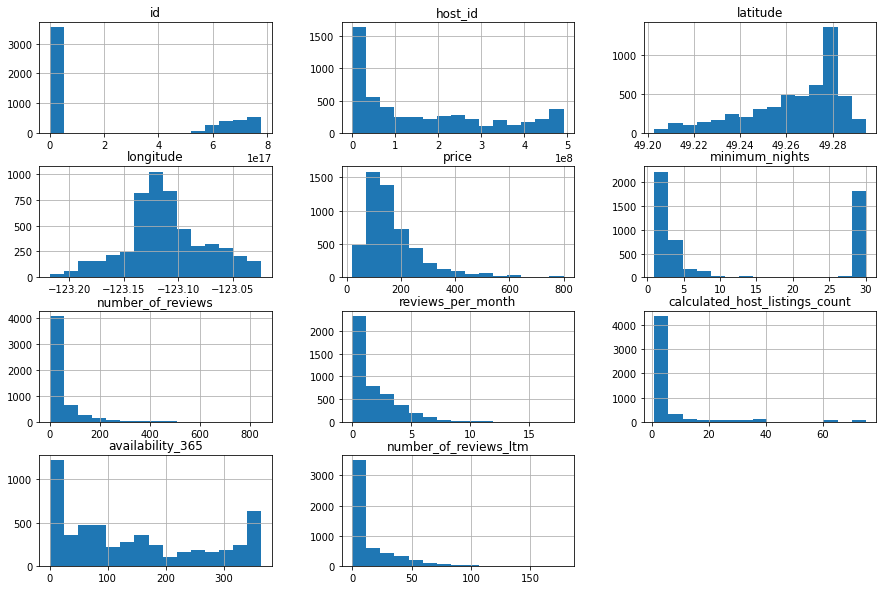

In [17]:
# Gerar uma cópia do DataFrame onde será realizada a limpeza
df_clean = df.copy()

# Remover entradas de valores acima de 800 na coluna price
df_clean.drop(df_clean[df_clean.price > 800].index, axis=0, inplace=True)

# Remover entradas de valores acima de 30 na coluna minimum_nights
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# Remover a coluna neighbourhood_group, pois não possui nenhuma entrada
df_clean.drop("neighbourhood_group", axis=1, inplace=True)

# Plotar os histogramas atualizados das variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

Com este *DataFrame* sem os *outliers* identificados, podemos verificar novamente o resumo estatístico das nossas variáveis numéricas.

In [18]:
# Verificar o resumo estatístico de todas as variáveis numéricas do DataFrame limpo
df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5262.000000,5262.000000,5262.000000,4436.000000,5262.000000,5262.000000
mean,171.316610,12.277081,40.272520,1.782536,5.651463,143.048271
std,111.310531,13.201219,69.083389,1.815094,12.780387,125.083652
min,20.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,100.000000,2.000000,2.000000,0.360000,1.000000,32.000000
50%,140.000000,3.000000,12.000000,1.075000,1.000000,108.000000
75%,200.000000,30.000000,49.000000,2.790000,3.000000,252.000000
max,800.000000,30.000000,846.000000,17.930000,75.000000,365.000000


A partir deste novo resumo estatístico, verificamos que os dados representam melhor a realidade da nossa análise:
* Ao removermos 90 entradas acima de 800 dólares (1.5856% do total), o valor médio da variável `price` agora é 171.31 dólares. Este valor está abaixo de 75% das entradas (200 dólares)
* A média da variável `mininum_nights` reduziu de 17.22 dias para 12.27 dias.

### **Q4. Qual a correlação existente entre as variáveis**
Uma correlação entre elementos indica que pode existir uma relação entre elas.
Em nossa análise, procuramos identificar variáveis que sejam diretamente ou inversamente impactadas por outras.
É possível mensurar a relação entre duas variáveis e é função do coeficiente de correlação estabelecer qual a intensidade dela.
Para identificar correlações entre as variáveis de interesse vamos seguir 2 passos:

1. Calcular uma matriz de correlação
2. Gerar um *heatmap* (mapa de calor) a partir desta matriz para auxiliar a visualização da correlação

In [19]:
# criar uma matriz de correlação
corr = df_clean[["price", "minimum_nights", "number_of_reviews", "reviews_per_month",
           "calculated_host_listings_count", "availability_365"]].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.126059,-0.100430,-0.051673,-0.063196,0.078555
minimum_nights,-0.126059,1.000000,-0.252826,-0.449150,0.280052,0.173055
number_of_reviews,-0.100430,-0.252826,1.000000,0.474585,-0.156587,-0.055689
reviews_per_month,-0.051673,-0.449150,0.474585,1.000000,-0.124849,0.075220
calculated_host_listings_count,-0.063196,0.280052,-0.156587,-0.124849,1.000000,0.079857
availability_365,0.078555,0.173055,-0.055689,0.075220,0.079857,1.000000


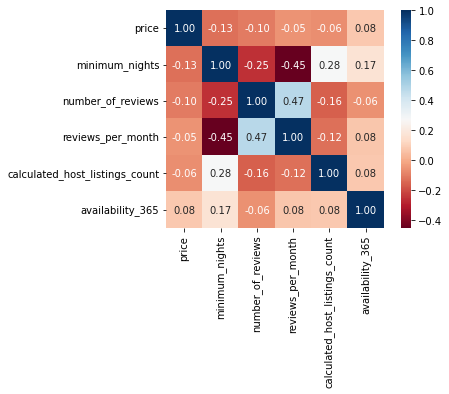

In [20]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap="RdBu", fmt=".2f", square=True, linecolor="white", annot=True);

Ao observarmos o *heatmap*, podemos identificar algumas correlações:


*   As avaliações mensais (*reviews_per_month*) possuem uma correlação negativa com a quantidade mínima de noites (*minimum_nights*). Por exemplo, um anfitrião que permite 30 dias sendo o mínimo para a locação, poderá receber somente uma avaliação por mês. Enquanto que outro anfitrião que permita apenas uma noite, poderá ter até 31 avaliações mensais dependendo do mês.
*   O número de avaliações (*number_of_reviews*) possui uma correlação positiva com as avaliações mensais (*reviews_per_month*). Mais avaliações mensais representam mais avaliações no total.



### **Q5. Qual o tipo de imóvel mais alugado no Airbnb na cidade de Vancouver?**
O Airbnb possibilita aos anfitriões cadastrarem alguns tipos de acomodações para seus hóspedes. Casa/apartamento inteiro, quarto privado ou compartilhado e até mesmo quarto de hotel. O viajante pode escolher qual tipo de experiência quer durante uma viagem de lazer ou trabalho.

No nosso banco de dados, a variável *room_type* armazena a informação do tipo de acomodação oferecida pelo anfitrião.

Vamos identificar algumas características dos espaços oferecidos:
1. Verificar a quantidade de cada tipo de imóvel oferecido através do método `value_counts()`.
2. Verificar a porcentagem de cada tipo de imóvel.
3. Calcular o número de avaliações publicadas pelos usuários para cada tipo de espaço.

In [21]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    4330
Private room        910
Shared room          17
Hotel room            5
Name: room_type, dtype: int64

In [22]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.822881
Private room       0.172938
Shared room        0.003231
Hotel room         0.000950
Name: room_type, dtype: float64

In [23]:
# Número total de reviews do período
print("Quantidade de reviews publicadas pelos usuários: {} \n".format(df_clean.number_of_reviews.sum()))

# Listar os tipos de imóveis pela quantidade de reviews recebida
df_clean.groupby(['room_type']).number_of_reviews.sum().sort_values(ascending=False)

Quantidade de reviews publicadas pelos usuários: 211914 



room_type
Entire home/apt    174174
Private room        36976
Shared room           668
Hotel room             96
Name: number_of_reviews, dtype: int64

Pela quantidade de avaliações e número de acomodações disponíveis na categoria casa/apartamento inteiro, observamos que esse tipo de acomodação é a preferência das pessoas que utilizam o serviço do Airbnb na cidade de Vancouver. Acomodações mais baratas como quartos compartilhados não são tão populares.

### **Q6. Qual a localidade mais cara do dataset?**

Ao pesquisar uma acomodação, um viajante explorando novas cidades fica perdido por não saber em qual região os preços estão dentro do seu orçamento. Com os dados que temos disponíveis em nosso *dataset* de estudo, podemos avaliar os valores médios de cada bairro (*neighbourhood*) e classificar as localidades mais caras.


In [24]:
# ver preços por bairros, na média
df_clean.groupby(["neighbourhood"]).price.mean().sort_values(ascending=False)

neighbourhood
Kitsilano                   214.671605
Arbutus Ridge               210.757143
West Point Grey             195.205479
Downtown                    188.615658
Downtown Eastside           173.542125
Dunbar Southlands           172.924658
West End                    172.846482
Riley Park                  169.087121
Fairview                    167.240876
Mount Pleasant              163.600619
South Cambie                162.656250
Grandview-Woodland          161.074074
Strathcona                  157.875000
Shaughnessy                 157.537313
Kensington-Cedar Cottage    154.890208
Sunset                      146.224138
Kerrisdale                  144.194444
Victoria-Fraserview         142.311828
Marpole                     137.977778
Hastings-Sunrise            135.704762
Killarney                   134.325301
Oakridge                    131.268657
Renfrew-Collingwood         125.756098
Name: price, dtype: float64

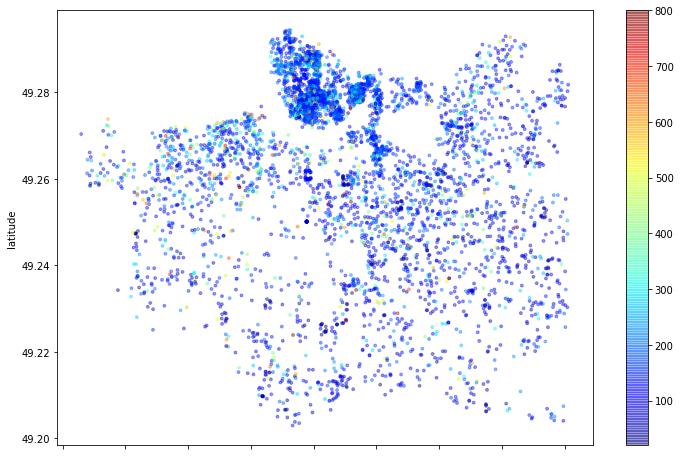

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, c=df_clean["price"], s=8, cmap=plt.get_cmap("jet"), figsize=(12,8));

De posse da lista dos valores médios dos bairros e com o gráfico de localização dos anúncios, o viajante pode escolher qual localidade atende suas expectativas de experiência e orçamento.

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**
O viajante que irá apenas passar a noite no local ou aquele que pretende ter a experiência de viver alguns dias em uma localidade nova são perfeitamente atendidos pela plataforma do Airbnb.
Cada anfitrião define quantas noites no minimo o hóspede necessita alugar para ter sua reserva aceita. Vamos calcular a média da quantidade mínima de noites necessárias para reservar uma acomodação na cidade de Vancouver.
A variável *minimum_nights* armazena a informação de cada acomodação.

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

12.277080957810718

Em média, os anfitriões desta localidade exigem 13 dias para aprovar uma reserva. Observa-se que existem bastante opções, desde estadias curtas de uma noite até várias semanas.

## Conclusões


Esta análise exploratória nos dados disponibizados pelo Airbnb nos permitiu entender a dinâmica das acomodações disponíveis na região de Vancouver, Canadá.

Logo no início, observamos que o *dataset* possuía valores ausentes e também *outliers*. Para não distorcer nossa análise, realizamos a limpeza destes dados para então partir para os Insights.
Mesmo com este *dataset* resumido, pudemos avaliar as correlações entre as informações, regiões mais caras e os tipos de locações disponibizadas. Uma análise mais profunda pode ser realizada para a mesma cidade, utilizando um conjunto de dados mais completos disponibilizados pela mesma plataforma. Com os dados que obtivemos, partimos para as análises.

As correlações permitiram verificar que um anúncio com menos avaliações não significa necessariamente que está sendo menos alugado. O que pode estar acontecendo é que o anfitrião dê preferência para locações de maior duração.

Calculamos quais as regiões têm maior valor médio de locação e juntamente com os dados de latitude e longitude, podemos quase enxergar um mapa da cidade. Isto pode auxiliar o viajante na escolha do lugar mais estratégico para sua estadia. Dependendo do bairro escolhido, ele irá gastar entre 125 até 214 dólares em média por noite de estadia.

Em relação ao tipo de imóvel disponibizado, observamos que existe uma preferência por casas ou apartamentos inteiros representando mais de 82% das acomodações disponíveis. Vancouver é uma cidade turística com vários hotéis mas percebemos que, em geral, eles não fazem uso da plataforma do Airbnb pois temos apenas alguns anúncios desse tipo de acomodação.

Vancouver é uma cidade magnífica e quem tiver a oportunidade de visitá-la por alguns dias não se arrependerá. Praia, montanha, um grande centro urbano, pessoas de todos os cantos do mundo fazem parte do dia-a-dia de Vancouver. Os insights extraídos nesta análise irão aulixiar no planejamento da sua estadia.


